## A. Random Forest Algorithm (File: 12_random_forest_intro.pdf)
Penjelasan & Penyelesaian Latihan:

Slide menjelaskan dasar-dasar decision trees dan bagaimana random forests menggunakan multiple trees untuk mengurangi overfitting dan meningkatkan akurasi prediksi.

Konsep utama: ensemble learning, bagging, feature randomness, dan majority voting.

Contoh bagaimana multiple decision trees dapat mengklasifikasi data.

Latihan:
Diterapkan konsep decision trees dan random forests ke dataset "diabetes.csv" untuk memahami bagaimana tree averaging membantu kestabilan prediksi.


## 1. Penjelasan Kode dan Model

Notebook ini membangun model Decision Tree Classifier untuk memprediksi diabetes berdasarkan dua fitur utama: Glucose dan BMI dari dataset.

Langkah-langkah utama yang dilakukan meliputi:

- **Preprocessing Data**: Memilih fitur Glucose dan BMI serta label target (diabetes: 0 atau 1).
- **Split Dataset**: Memisahkan data menjadi data latih dan data uji.
- **Train Decision Tree**: Melatih model menggunakan DecisionTreeClassifier dari library sklearn.
- **Evaluasi Model**: Menghitung akurasi, classification report, dan confusion matrix untuk menilai performa model.
- **Visualisasi Pohon Keputusan**: Menampilkan struktur decision tree menggunakan plot_tree.

Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[83 16]
 [21 34]]


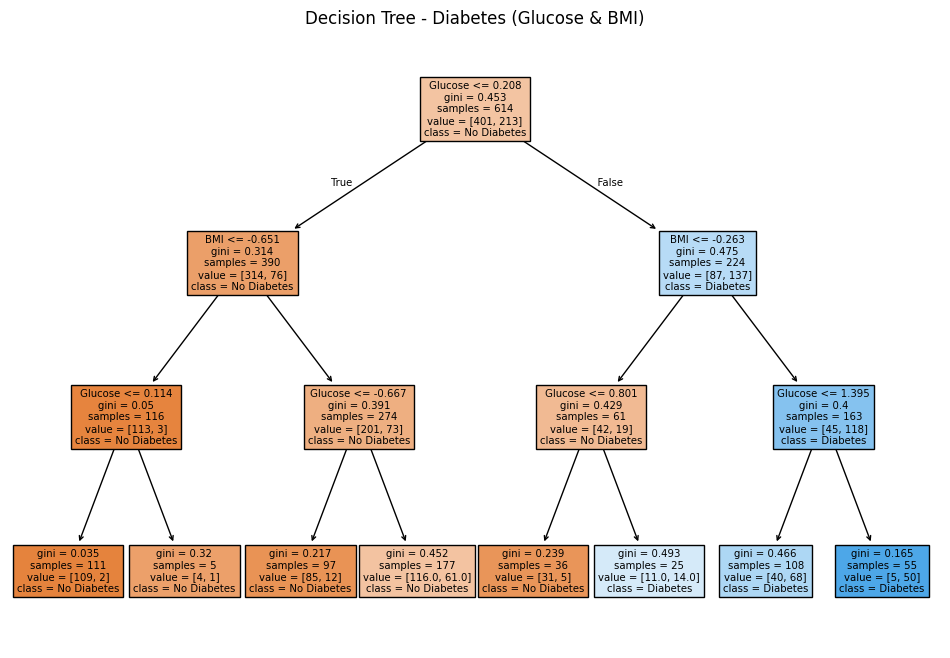

In [1]:
# 1. Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset
df = pd.read_csv("diabetes.csv")

# 3. Pilih dua fitur: Glucose & BMI
X = df[['Glucose', 'BMI']]
y = df['Outcome']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Latih model Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# 7. Evaluasi model
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Glucose', 'BMI'], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree - Diabetes (Glucose & BMI)")
plt.show()


## 2. Hasil Evaluasi Model

**Akurasi:**
 0.7597402597402597 (sekitar 76 persen)

**Classification Report:**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (No Diabetes) | 0.80 | 0.84 | 0.82 | 99 |
| 1 (Diabetes)    | 0.68 | 0.62 | 0.65 | 55 |

Makna:

- Model lebih baik dalam mengenali kelas "No Diabetes" dibanding "Diabetes".
- F1-score untuk kelas diabetes hanya 0.65, menunjukkan bahwa masih terdapat kesalahan dalam mendeteksi kasus diabetes.

**Confusion Matrix:**

[[83 16]  
 [21 34]]

Penjelasan:

- 83: Prediksi benar sebagai non-diabetes.
- 34: Prediksi benar sebagai diabetes.
- 16: False positive – diprediksi diabetes, padahal tidak.
- 21: False negative – sebenarnya diabetes, tapi diprediksi tidak.

## 3. Visualisasi Pohon Keputusan

Decision tree menunjukkan proses pengambilan keputusan berbasis aturan if-else yang didasarkan pada nilai Glucose dan BMI.

Interpretasi:

**Root Node (paling atas):**

Glucose <= 0.208  
gini = 0.453  
samples = 614  
class = No Diabetes

Artinya, jika nilai Glucose ≤ 0.208 (dalam skala yang telah dinormalisasi atau distandarisasi), maka data akan diteruskan ke cabang kiri pohon.

**Leaf Node (daun):**

class = No Diabetes  
samples = 111  
gini = 0.035  
value = [109, 2]

Artinya dari 111 sampel pada node ini, 109 merupakan non-diabetes dan 2 merupakan diabetes. Nilai gini impurity sangat rendah, yang berarti keputusan sangat pasti.

## Kesimpulan

- Model Decision Tree memiliki akurasi sekitar 76 persen.
- Lebih akurat dalam mendeteksi pasien non-diabetes dibandingkan pasien diabetes.
- Visualisasi pohon membantu menjelaskan logika pengambilan keputusan model berdasarkan Glucose dan BMI.
- Performa model masih bisa ditingkatkan melalui tuning parameter atau dengan menambahkan fitur lain.
